In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import opendatasets as od

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dense, MaxPooling2D,Flatten,Dropout,Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras import regularizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import datetime
from tensorflow.keras.utils import plot_model

In [6]:
od.download("https://www.kaggle.com/datasets/sumansid/facemask-dataset",data_dir="dataset1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tahakoleilat1
Your Kaggle Key: ··········


100%|██████████| 114M/114M [00:01<00:00, 104MB/s]


In [7]:
od.download("https://www.kaggle.com/datasets/ahemateja19bec1025/facemask-dataset",data_dir="dataset2")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tahakoleilat1
Your Kaggle Key: ··········


100%|██████████| 50.4M/50.4M [00:00<00:00, 178MB/s]


In [8]:
od.download("https://www.kaggle.com/datasets/vinaykudari/facemask",data_dir="dataset3")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: tahakoleilat1
Your Kaggle Key: ··········


100%|██████████| 137M/137M [00:01<00:00, 129MB/s]


In [9]:
od.download("https://www.kaggle.com/datasets/pranavsingaraju/facemask-detection-dataset-20000-images",data_dir="dataset4")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tahakoleilat1
Your Kaggle Key: ··········


100%|██████████| 604M/604M [00:04<00:00, 138MB/s]


In [10]:
od.download("https://www.kaggle.com/datasets/ashiqurrahmantanzil/facemask-dataset",data_dir="dataset5")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tahakoleilat1
Your Kaggle Key: ··········


100%|██████████| 1.26G/1.26G [00:08<00:00, 161MB/s]


In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [12]:
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)

In [13]:
train_dataset1  = train_datagen.flow_from_directory(directory = '/content/dataset1/facemask-dataset',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'Mask': 0,'No Mask': 1})
valid_dataset1 = valid_datagen.flow_from_directory(directory = '/content/dataset1/facemask-dataset',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'Mask': 0,'No Mask': 1})

Found 270 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


In [14]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset2  = train_datagen.flow_from_directory(directory = '/content/dataset2/facemask-dataset/dataset/dataset',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'1': 0,'0': 1})
valid_dataset2 = valid_datagen.flow_from_directory(directory = '/content/dataset2/facemask-dataset/dataset/dataset',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'1': 0,'0': 1})

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset3  = train_datagen.flow_from_directory(directory = '/content/dataset3/facemask/train',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
valid_dataset3 = valid_datagen.flow_from_directory(directory = '/content/dataset3/facemask/train',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 435 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [16]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset4  = train_datagen.flow_from_directory(directory = '/content/dataset4/facemask-detection-dataset-20000-images',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'new_with_mask': 0,'new_without_mask': 1})
valid_dataset4 = valid_datagen.flow_from_directory(directory = '/content/dataset4/facemask-detection-dataset-20000-images',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'new_with_mask': 0,'new_without_mask': 1})

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [17]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset5  = train_datagen.flow_from_directory(directory = '/content/dataset5/facemask-dataset/dataset_final',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
test_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset5/facemask-dataset/dataset_final',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                 shuffle = False,
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 11869 images belonging to 2 classes.
Found 2966 images belonging to 2 classes.


In [18]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [19]:
training_set = combine_gen(train_dataset1,train_dataset2,train_dataset3,train_dataset4,train_dataset5)
valid_set =  combine_gen(valid_dataset1,valid_dataset2,valid_dataset3,valid_dataset4)
test_set = test_dataset

In [42]:
import numpy as np 
import pandas as pd


import seaborn as sn
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def build_model(resnet, nodes, drop_rate, activation):
    return Sequential([
        resnet,
        Flatten(),
        Dense(nodes,kernel_initializer='he_uniform'),
        BatchNormalization(),
        Activation('relu'),
        Dropout(drop_rate),
        Dense(1,activation='sigmoid')
    ])
def train_model(model, epochs, learning_rate):
   checkpoint_filepath = '/tmp/checkpointNew'
   earlyStopping = tf.keras.callbacks.EarlyStopping(
        patience=5,
        monitor="val_accuracy",
        verbose=1,)
   model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
       filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_freq="epoch")
   lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-10)
   adam = keras.optimizers.Adam(learning_rate=learning_rate)
   METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]
   model.compile(optimizer=adam, loss='binary_crossentropy', metrics=METRICS)
   history = model.fit(training_set, validation_data = valid_set,validation_steps = 100, batch_size = 512, steps_per_epoch= 200,  epochs = epochs,
                        callbacks=[model_checkpoint_callback,earlyStopping,lrd])
   return history
def plot_metrics(model, history, test):
    print("Accuracy of model on testing data : " , model.evaluate(test_set)[1]*100 , "%")
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" Metrics evaluation of the model ")

    ax1.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
    ax1.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
    ax2.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(history.history['auc']) + 1), history.history['auc'])
    ax3.plot(range(1, len(history.history['val_auc']) + 1), history.history['val_auc'])
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(history.history['precision']) + 1), history.history['precision'])
    ax4.plot(range(1, len(history.history['val_precision']) + 1), history.history['val_precision'])
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(history.history['recall']) + 1), history.history['recall'])
    ax5.plot(range(1, len(history.history['val_recall']) + 1), history.history['val_recall'])
    ax5.set_title('History of Recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])
    plt.show()
def test_model(model, test_set):
    y_pred = model.predict(test_set)
    y_result = []
    for p in y_pred:
        y_result.append(int(p >= 0.5))
    
    y_actual = []
    for i in range(len(test_set)):
        for p in test_set[i][1]:
            y_actual.append(int(p >= 0.5))
    
    print(classification_report(y_actual, y_result))
    
    cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

    plt.figure(figsize = (10, 8))
    sn.heatmap(cm, annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
def CNN(resnet, dense_nodes, drop, activation, epochs, lr):
    model = build_model(resnet50, dense_nodes, drop, activation)
    model.summary()
    
    history = train_model(model, epochs, lr)
    
    plot_metrics(model, history, test_set)
    
    test_model(model, test_set)
    return model


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               8388864   
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                      

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch 1/10
200/200 [==============================] - 100s 464ms/step - loss: 0.0915 - accuracy: 0.9666 - precision: 0.9621 - recall: 0.9670 - auc: 0.9943 - val_loss: 0.0761 - val_accuracy: 0.9882 - val_precision: 0.9940 - val_recall: 0.9816 - val_auc: 0.9961 - lr: 1.0000e-04
Epoch 2/10
200/200 [==============================] - 89s 446ms/step - loss: 0.0206 - accuracy: 0.9938 - precision: 0.9945 - recall: 0.9922 - auc: 0.9996 - val_loss: 0.0970 - val_accuracy: 0.9871 - val_precision: 0.9833 - val_recall: 0.9893 - val_auc: 0.9926 - lr: 1.0000e-04
Epoch 3/10
200/200 [==============================] - 90s 453ms/step - loss: 0.0159 - accuracy: 0.9949 - precision: 0.9941 - recall: 0.9948 - auc: 0.9997 - val_loss: 0.0509 - val_accuracy: 0.9918 - val_precision: 0.9873 - val_recall: 0.9955 - val_auc: 0.9955 - lr: 1.0000e-04
Epoch 4/10
 29/200 [===>..........................] - ETA: 1:01 - loss: 0.0148 - accuracy: 0.9967 - precision: 1.0000 - recall: 0.9931 - auc: 0.9999

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 90s 450ms/step - loss: 0.0110 - accuracy: 0.9970 - precision: 0.9980 - recall: 0.9956 - auc: 0.9999 - val_loss: 0.0395 - val_accuracy: 0.9924 - val_precision: 0.9916 - val_recall: 0.9924 - val_auc: 0.9957 - lr: 1.0000e-04
Epoch 5/10
200/200 [==============================] - 92s 461ms/step - loss: 0.0093 - accuracy: 0.9978 - precision: 0.9973 - recall: 0.9979 - auc: 0.9997 - val_loss: 0.0113 - val_accuracy: 0.9950 - val_precision: 0.9940 - val_recall: 0.9955 - val_auc: 0.9999 - lr: 1.0000e-04
Epoch 6/10
200/200 [==============================] - 90s 450ms/step - loss: 0.0105 - accuracy: 0.9970 - precision: 0.9972 - recall: 0.9962 - auc: 0.9999 - val_loss: 0.0103 - val_accuracy: 0.9957 - val_precision: 0.9933 - val_recall: 0.9977 - val_auc: 1.0000 - lr: 1.0000e-04
Epoch 7/10
200/200 [==============================] - 90s 452ms/step - loss: 0.0134 - accuracy: 0.9971 - precision: 0.9962 - recall: 0.9976 - auc: 0.9996 - val_loss: 0.0132 - val_accu

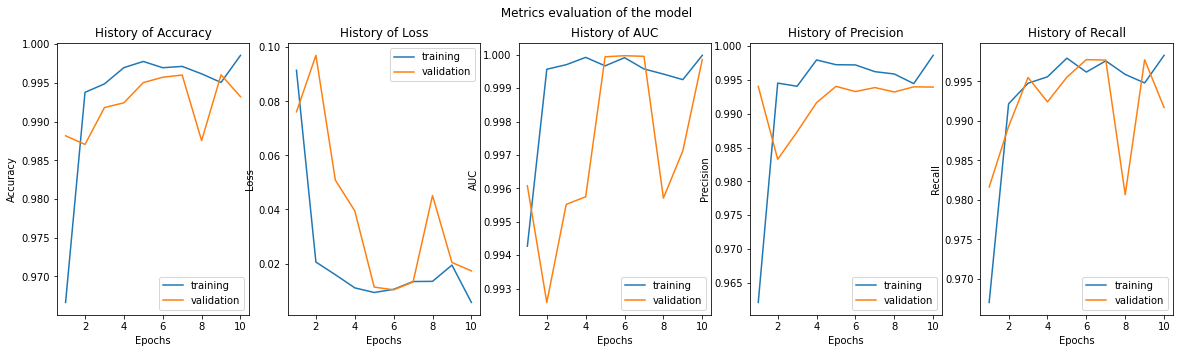

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1645
           1       0.98      1.00      0.99      1321

    accuracy                           0.99      2966
   macro avg       0.99      0.99      0.99      2966
weighted avg       0.99      0.99      0.99      2966



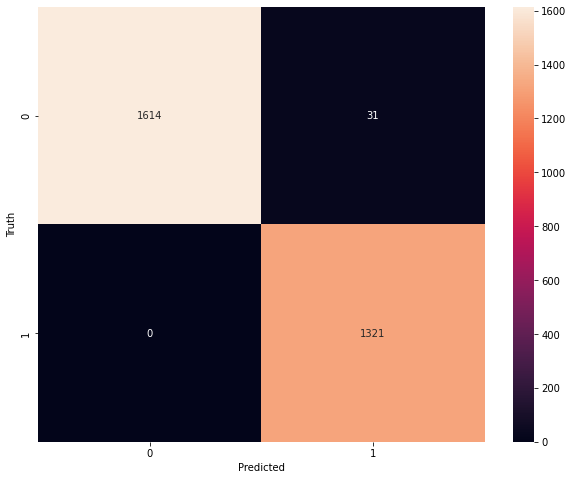

In [43]:
resnet50 = tf.keras.applications.resnet.ResNet50(include_top = False, input_shape = (128, 128, 3), weights = 'imagenet', pooling = "Max")
for layer in resnet50.layers:
    layer.trainable=True
nodes = 256
drop_rate = 0.4
activation = 'sigmoid'
epochs = 10
lr = 0.0001

model = CNN(resnet50, nodes, drop_rate, activation, epochs, lr)

In [44]:
from keras.models import load_model

model.save('model_weights.h5')

In [45]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)